### ML/DL HW2 - Data Analysis with NYC Taxi dataset

1. Copy this notebook and solve them by following the instruction.
2. Upload the dataset in your directory before executing this code.
  * Train data (71,514 rows; 2023/01/01-2023/01/23): [Download](https://drive.google.com/file/d/15Ne57MIFPFYgDMpbL5kOly9CjAoZe19r/view?usp=sharing)
  * Test data (28,390 rows; 2023/01/24-2023/01/31): [Download](https://drive.google.com/file/d/15Mi8vm2guvePB7RaY6LPi3fxXOwLFlyw/view?usp=sharing)

3. Note: Your code for all of the programming exercises including this one should be submitted to the corresponding Programming submission slot on Gradescope.

Reference
* https://github.com/TanmayKedari/Exploratory-Analysis-of-NYC-Taxi/blob/master/NYC%20Taxi%20Trip%20Duration.ipynb

In [8]:
import numpy as np
import pandas as pd
from google.colab import files
files=files.upload()

Saving yellow_tripdata_2023-01_small_test.parquet to yellow_tripdata_2023-01_small_test.parquet
Saving yellow_tripdata_2023-01_small_train.parquet to yellow_tripdata_2023-01_small_train.parquet


In [9]:
# Check the below cells before fill in your code.

import pyarrow.parquet as pq

class Dataset:
  train_x = None  # X (data) of training set.
  train_y = None  # Y (label) of training set.
  test_x = None # X (data) of test set.
  test_y = None # Y (label) of test set.

  def __init__(self):
    self.df_train = pq.read_table('./yellow_tripdata_2023-01_small_train.parquet').to_pandas()
    self.df_test = pq.read_table('./yellow_tripdata_2023-01_small_test.parquet').to_pandas()
    self.df_train = self.preprocess_data(self.df_train)
    self.df_test = self.preprocess_data(self.df_test)

    self.df_train['trip_duration'] = (self.df_train['tpep_dropoff_datetime'] - self.df_train['tpep_pickup_datetime']).dt.total_seconds()
    self.df_test['trip_duration'] = (self.df_test['tpep_dropoff_datetime'] - self.df_test['tpep_pickup_datetime']).dt.total_seconds()

  def preprocess_data(self, df):
    df['RatecodeID'].fillna(df['RatecodeID'].mean(), inplace=True)
    df['store_and_fwd_flag'].fillna('N', inplace=True) # because 'N' is much more than 'Y'.
    df['passenger_count'].fillna(df['passenger_count'].mean(), inplace=True)
    df['congestion_surcharge'].fillna(df['congestion_surcharge'].mean(), inplace=True)
    df['airport_fee'].fillna(df['airport_fee'].mean(), inplace=True)

    return df

  def getdata_linear_reg(self):
    ### Hint: Use self.df_train, self.df_test
    ### Three features (x): Passenger_count, trip_distance, trip_duration (seconds; use tpep_pickup_datetime, tpep_dropoff_datetime)
    ### Target (y): fare_amount

    self.train_x = self.df_train[['passenger_count', 'trip_distance', 'trip_duration']]
    self.train_y = self.df_train['fare_amount']

    self.test_x = self.df_test[['passenger_count', 'trip_distance', 'trip_duration']]
    self.test_y = self.df_test['fare_amount']

    return (self.train_x, self.train_y, self.test_x, self.test_y)

  def correlation(self, X, Y):
    correlation_matrix = X.corrwith(Y)

    return correlation_matrix



# Test Code

Provide some test code with your Linear regression code. Also, Compare with sklearn.LinearRegression().

### 1. Prepare the dataset (8pt)
Load the train and test datasets.

methods:

(1) **preprocess_data(self, df)**: Handle None and null values (2pt)

(2) **getdata_linear_reg(self)**: Separate the features/labels of the train/test set and save them separately in a numpy array format.(4pt)

(3) **correlation(self, X, Y)**: Calculate the correlation between each features and target Y in training set (2pt)



In [10]:
dataset = Dataset()
dataset.df_train.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
trip_duration            0
dtype: int64

In [11]:
dataset.df_test.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
trip_duration            0
dtype: int64

In [12]:
[train_x, train_y, test_x, test_y] = dataset.getdata_linear_reg()
print(train_x)
print(train_y)
print(test_x)
print(test_y)

print('-------------------------------------')
dataset.correlation(train_x, train_y)

       passenger_count  trip_distance  trip_duration
0                  1.0           2.95          922.0
1                  5.0           2.35         1715.0
2                  1.0           2.04          705.0
3                  1.0           7.05         1316.0
4                  1.0           0.80          337.0
...                ...            ...            ...
71509              1.0          10.48         1325.0
71510              1.0          17.65         2383.0
71511              1.0          12.12         1443.0
71512              1.0           1.64          506.0
71513              1.0           4.03          824.0

[71514 rows x 3 columns]
0        17.7
1        23.3
2        13.5
3        32.4
4         5.5
         ... 
71509    42.2
71510    70.0
71511    47.8
71512    10.7
71513    19.1
Name: fare_amount, Length: 71514, dtype: float64
       passenger_count  trip_distance  trip_duration
0             1.000000           1.78          472.0
1             1.000000       

passenger_count    0.037161
trip_distance      0.891860
trip_duration      0.792956
dtype: float64

### Question 2: Linear Regression Using Scikit-learn (6 points)

For this task, you are required to implement linear regression utilizing the scikit-learn library. You will be working with the LinearRegression module, which provides functions and methods tailored for this purpose.

For comprehensive documentation and usage guidelines, please refer to the official scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Ensure to:
* Properly import the necessary libraries and modules.
* Provide a brief explanation or observation after obtaining the results.

Root Mean Squared Error (RMSE) on test data: 6.70

Model Coefficients: [0.11415376 2.92476095 0.00525156]
Model Intercept: 3.71


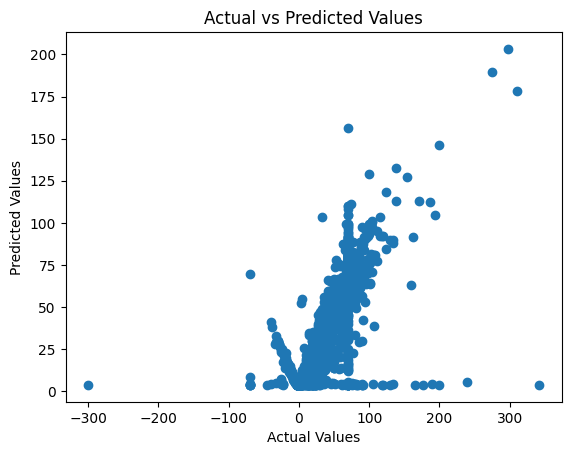

In [13]:
# Import required modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the Linear Regression model
linear = LinearRegression()

# Fit the model to the training data (Use train_x, train_y, and linear.fit function)
linear.fit(train_x, train_y)

# Predict the target values for the test dataset (Use linear.predict function and test_x to find y_hat)
y_hat = linear.predict(test_x)

def RMSE(true, predicted):
# Calculate the Root Mean Squared Error (RMSE) for model evaluation
  rmse = np.sqrt(mean_squared_error(true, predicted))
  return rmse

error = RMSE(test_y, y_hat)
print(f"Root Mean Squared Error (RMSE) on test data: {error:.2f}")

# Find the slope (coefficients) and intercepts
slope = linear.coef_
intercept = linear.intercept_
print(f"\nModel Coefficients: {slope}")
print(f"Model Intercept: {intercept:.2f}")

import matplotlib.pyplot as plt
# Add plots to visualize the difference between actual vs predicted values
plt.scatter(test_y, y_hat)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


### 3. Craft Your Linear Regression Algorithm (6pt)
Delve into the foundations of linear regression by constructing your own model to make predictions on the dataset.

While detailed annotations will guide your implementation, do not use external libraries such as scikit-learn. Using the numpy library is permitted.

Begin your exploration by understanding the closed form solution for linear regression. Subsequently, familiarize yourself with the gradient descent methodology.



In [113]:
import numpy as np

class Linear:

    w = None

    def __init__(self, eta=0.5, epochs=100, alpha=0.01):
        self.eta = eta
        self.epochs = epochs
        self.alpha = alpha  # L2 regularization parameter

    def setEta(self, etaVal):
        self.eta = etaVal

    def setEpoch(self, nepoch):
        self.epochs = nepoch

    def predict(self, X):
        """
        Perform inference
        """
        if self.w is None:
            raise ValueError("Model not trained. Call 'train' method first.")

        # Perform linear regression prediction
        y_pred = np.dot(X, self.w)
        return y_pred

    def train(self, X, Y, X_valid=None, Y_valid=None):
        """
        Construct a vanilla linear regressor using gradient descent.
        """
        # Check for NaN values in input data
        if X.isnull().any().any() or Y.isnull().any():
            raise ValueError("Input data contains NaN values. Check your data preprocessing.")

        # Check if the target variable contains NaN values
        if Y.isnull().any():
            raise ValueError("Target variable contains NaN values. Check your target variable.")

        # Ensure that X and Y have compatible shapes
        if X.shape[0] != Y.shape[0]:
            raise ValueError("Input data (X) and target variable (Y) must have the same number of samples.")

        # Feature scaling (standardization)
        X = (X - X.mean()) / X.std()

        # Initialize weights with zeros
        self.w = np.zeros(X.shape[1])

        best_rmse = float('inf')
        best_w = None

        for epoch in range(self.epochs):
            # Calculate predictions
            y_pred = self.predict(X)

            # Calculate the error
            error = Y - y_pred

            # Update weights using gradient descent with L2 regularization
            gradient = (-np.dot(X.T, error) + self.alpha * self.w) / len(X)

            self.w -= self.eta * gradient

        # Use the best weights found during training
        if best_w is not None:
            self.w = best_w

    def RMSE(self, true, predicted):
        """
        Return Root Mean Squared Error
        """
        # Calculate the squared error for each data point
        squared_error = (true - predicted) ** 2

        # Calculate the mean of squared errors
        mean_squared_error = squared_error.mean()

        # Take the square root to get RMSE
        rmse = np.sqrt(mean_squared_error)

        return rmse


In [114]:
model = Linear()

In [115]:
model.train(train_x, train_y)

In [116]:
y_hat = model.predict(test_x)
print(y_hat)

[1653.26007748  383.50311575 2712.16415614 ... 3786.27632827 1892.46062409
 2937.2027286 ]


In [117]:
error = RMSE(test_y, y_hat)
print(error)

3773.6447068465222
